In [99]:
# Importing the required libraries

import cv2
import numpy as np
import pandas as pd
import os
import glob
import pickle
import time
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image

In [100]:
import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('OpenCV version:', cv2.__version__)

Tensorflow version: 2.1.0
OpenCV version: 4.2.0


In [101]:
input_path = 'D:\\'
train_dir = glob.glob(input_path + 'train_sample_videos\\*.mp4')

In [102]:
df_train = pd.read_json(input_path + 'train_sample_videos\\metadata.json').transpose()
df_train.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


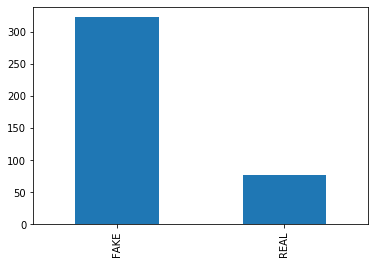

In [103]:
df_train.label.value_counts().plot.bar()

In [104]:
df_train.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [105]:
i = 0
for ind in df_train.index: 
    if(i > 243):
        break
    if(df_train['label'][ind] == 'FAKE'):
        i += 1
        train_dir.remove(input_path + 'train_sample_videos\\' + ind)

In [106]:
len(train_dir)

156

In [107]:
# Taking the base model as Inception V3 and initializing its weight with imagenet

# Enable internet on kernel settings
input_tensor = Input(shape = (229, 229, 3))
cnn_model = InceptionV3(input_tensor = input_tensor, weights = 'imagenet', include_top = False, pooling = 'avg')
cnn_model.summary()


d_69[0][0]       
__________________________________________________________________________________________________
batch_normalization_718 (BatchN (None, 12, 12, 192)  576         conv2d_718[0][0]                 
__________________________________________________________________________________________________
batch_normalization_721 (BatchN (None, 12, 12, 192)  576         conv2d_721[0][0]                 
__________________________________________________________________________________________________
batch_normalization_726 (BatchN (None, 12, 12, 192)  576         conv2d_726[0][0]                 
__________________________________________________________________________________________________
batch_normalization_727 (BatchN (None, 12, 12, 192)  576         conv2d_727[0][0]                 
__________________________________________________________________________________________________
activation_718 (Activation)     (None, 12, 12, 192)  0           batch_normalization_718[0]

In [108]:
fpv = 5

In [109]:
# Creating 40 frames per video, resizing it to (229, 229, 3) and feeding it to Pretrained Inception-V3 to extract features
# Extracted features are stored in cnn_output

t = time.time()
cnn_output = {}
count1 = 0
for v in train_dir:
    t1 = time.time()
    folder_name = v.split('\\')[2]
    cap = cv2.VideoCapture(v)
    count = 0
    while count < fpv:
        cap.set(cv2.CAP_PROP_POS_MSEC,((count * 30) + 5000))   
        ret, frame = cap.read()
        frame = cv2.resize(frame, (229, 229))
        x = image.img_to_array(frame)
        x = np.expand_dims(x, axis = 0)
        x = preprocess_input(x)
        result = cnn_model.predict(x)
        if folder_name not in cnn_output.keys():
            cnn_output[folder_name] = []
        cnn_output[folder_name].append(list(result))
        count = count + 1
    count1 += 1
    print('Elapsed: ', time.time() - t1, ' | ', count1, '/', len(train_dir), ' | ', v)
print('Total elapsed: ', time.time() - t)

Elapsed:  3.7089040279388428  |  1 / 156  |  D:\train_sample_videos\abarnvbtwb.mp4
Elapsed:  2.3412983417510986  |  2 / 156  |  D:\train_sample_videos\aelfnikyqj.mp4
Elapsed:  1.7370452880859375  |  3 / 156  |  D:\train_sample_videos\afoovlsmtx.mp4
Elapsed:  1.8525900840759277  |  4 / 156  |  D:\train_sample_videos\agrmhtjdlk.mp4
Elapsed:  2.4033665657043457  |  5 / 156  |  D:\train_sample_videos\ahqqqilsxt.mp4
Elapsed:  1.9573817253112793  |  6 / 156  |  D:\train_sample_videos\ajqslcypsw.mp4
Elapsed:  1.9121525287628174  |  7 / 156  |  D:\train_sample_videos\anpuvshzoo.mp4
Elapsed:  2.0795888900756836  |  8 / 156  |  D:\train_sample_videos\asaxgevnnp.mp4
Elapsed:  2.1260945796966553  |  9 / 156  |  D:\train_sample_videos\atkdltyyen.mp4
Elapsed:  1.8462116718292236  |  10 / 156  |  D:\train_sample_videos\atvmxvwyns.mp4
Elapsed:  2.288675308227539  |  11 / 156  |  D:\train_sample_videos\avmjormvsx.mp4
Elapsed:  1.1455793380737305  |  12 / 156  |  D:\train_sample_videos\axntxmycwd.mp4
El

In [115]:
for val in cnn_output:
    print(cnn_output[val])

[array([0.23667696, 0.12123638, 0.34352493, ..., 0.        , 0.5883689 ,
       0.06134906], dtype=float32)]]
[[array([0.33516818, 0.04236129, 0.37238806, ..., 0.29794395, 0.08062825,
       0.3071143 ], dtype=float32)], [array([0.2955172 , 0.07479558, 0.33150047, ..., 0.28284347, 0.05203533,
       0.43456078], dtype=float32)], [array([0.2550313 , 0.0370702 , 0.33839047, ..., 0.25913393, 0.19429123,
       0.54706603], dtype=float32)], [array([0.24655859, 0.05071631, 0.3970109 , ..., 0.223475  , 0.18642148,
       0.57244354], dtype=float32)], [array([0.24655859, 0.05071631, 0.3970109 , ..., 0.223475  , 0.18642148,
       0.57244354], dtype=float32)]]
[[array([0.8154994 , 0.05716353, 1.3418527 , ..., 0.3761959 , 0.682626  ,
       1.2986156 ], dtype=float32)], [array([0.9025679 , 0.05435152, 1.2440493 , ..., 0.5515285 , 0.8534944 ,
       1.3685849 ], dtype=float32)], [array([0.8304424 , 0.05287828, 1.3110831 , ..., 0.539551  , 0.9358345 ,
       1.0713171 ], dtype=float32)], [array([

In [111]:
m = []
for i in vid:
    j = np.array(i)
    m.append(j.mean())

In [112]:
meanArray = np.array(m)
mean = meanArray.mean()

In [113]:
print(mean)

0.6227827
